<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


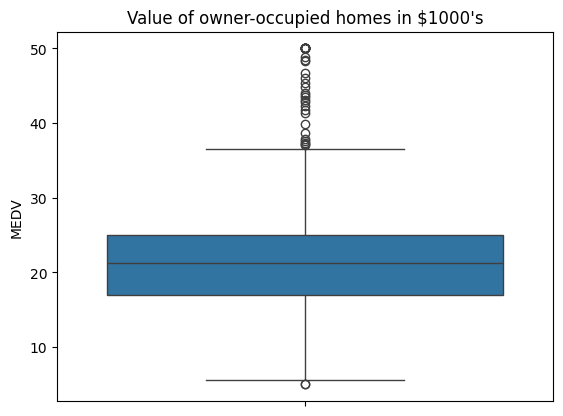

In [27]:
#boxplot for median value of owner-occupied homes
bplot = sns.boxplot(y = 'MEDV', data = boston_df)
bplot.set_title("Value of owner-occupied homes in $1000's")
pyplot.show()

<ipython-input-28-f9750deb4619>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(['tract bounds river', 'tract does not bound river'])


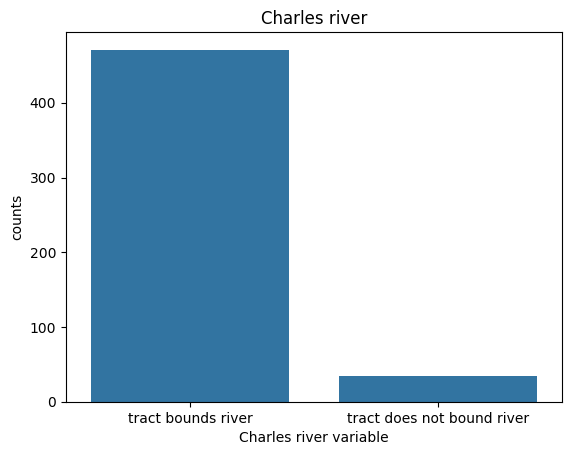

In [28]:
#barplot for Charles river variable
count = boston_df['CHAS'].value_counts()
plot = sns.barplot(x = count.index, y = count.values)
plot.set_xticklabels(['tract bounds river', 'tract does not bound river'])
pyplot.xlabel('Charles river variable')
pyplot.ylabel('counts')
pyplot.title('Charles river')
pyplot.show()

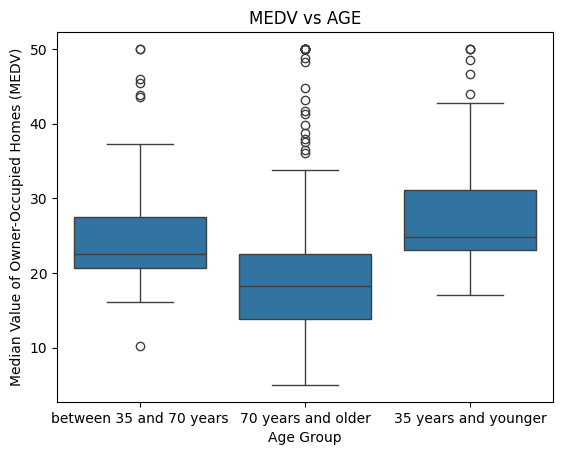

In [35]:
#boxplot between median value of owner-occupied homes and age group
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'
sns.boxplot(x = 'age_group', y = 'MEDV', data = boston_df)
pyplot.title('MEDV vs AGE')
pyplot.xlabel('Age Group')
pyplot.ylabel('Median Value of Owner-Occupied Homes (MEDV)')
pyplot.show()

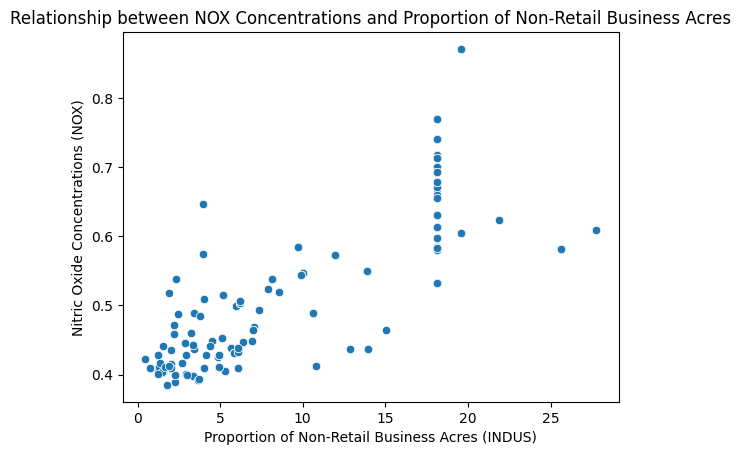

In [39]:
#scatterplot between nitric oxide concentration and proportion of non-retail business acres per town
sns.scatterplot(y = 'NOX', x = 'INDUS', data = boston_df)
pyplot.title('Relationship between NOX Concentrations and Proportion of Non-Retail Business Acres')
pyplot.xlabel('Proportion of Non-Retail Business Acres (INDUS)')
pyplot.ylabel('Nitric Oxide Concentrations (NOX)')
pyplot.show()
#positive correlation, so concentration of NOX increases when proportion of business acres increases

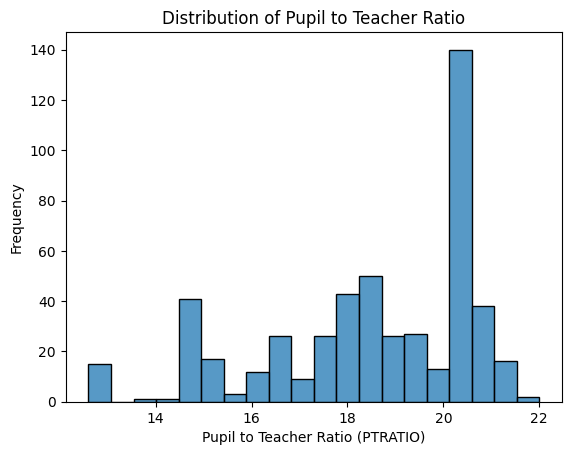

In [41]:
#histogram for pupil to teacher ratio (PTRATIO)
sns.histplot(boston_df['PTRATIO'], kde = False, bins = 20)
pyplot.title('Distribution of Pupil to Teacher Ratio')
pyplot.xlabel('Pupil to Teacher Ratio (PTRATIO)')
pyplot.ylabel('Frequency')
pyplot.show()

In [49]:
#making t-test to state whether there is a significant difference in median value of houses bounded by the Charles river or not
#H0: there is no difference in median value of houses 
#H1: there is a significant difference in median value of houses 
#first we will make levene's test to test whether variances are equal
scipy.stats.levene(boston_df[boston_df['CHAS'] == True]['MEDV'],
                     boston_df[boston_df['CHAS'] == False]['MEDV'], center = 'mean')
#p-value = 0.003 < 0.05, so we assume that variances are NOT equal
#then we make the t-test
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == True]['MEDV'],
                     boston_df[boston_df['CHAS'] == False]['MEDV'], equal_var = False)
#p-value = 0.003 < 0.05
#therefore we reject the null hypothesis
#therefore there is a significant difference in the median value of houses bounded by Charles river or not

TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

In [54]:
#making one way ANOVA to test if there is a difference in MEDV for each age group
#H0: there is no difference in MEDV for age groups
#H1: at least one age group has a different MEDV
#making levene's test to test equality of variance
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')
#since the p-value is > 0.05, we assume equal variances
#then we make the one way ANOVA test
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']
scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
#since p-value = 1.71 > 0.05, we fail to reject null hypothesis 
#as there is no sufficient evidence that there is a difference in MEDV for different age groups
#therefore there is no difference in MEDV for different age groups

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

In [56]:
#making pearson correlation test to test whether there is a relationship between NOX and proportion of non-retail business acres
#H0: there is no relationship between NOX and proportion of business acres
#H1: there exists a relationship between NOX and proportion of business acres
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
#since p-value < 0.05, we reject the null hypothesis
#therefore there exists a relationship between NOX and proportion of non-retail business acres per town

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [57]:
#making regression analysis to test the impact of an additional weighted distance to the five Boston employment centres (DIS) 
#on the median value of owner occupied homes (MEDV)
#H0: there is no evidence of correlation between DIS and MEDV
#H1: there is an evidence of correlation between DIS and MEDV
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict()
model.summary()
#since R-squared = 0.062, therefore the correlation coefficient R ~= 0.25
#also, the p-value = 0 which is < 0.05, so we reject the null hypothesis
#therefore, there is an evidence of correlation between DIS and MEDV

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 22 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        03:43:48   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""